In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

import ipywidgets as widgets
from IPython.display import display
from datetime import date, timedelta

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'notebook'

%load_ext autoreload
%autoreload 2


In [2]:
import lib.ptm_lib as ptm

In [3]:
# Mid Caps
tickers = ['AA', 'AACAY', 'AAL', 'AAON', 'AAP', 'AAPG', 'AB', 'ABCB', 'ABG', 'ACA', 'ACAD', 'ACDVF', 'ACHR', 'ACI', 'ACIW', 'ACLX', 'ACM', 'ACT', 'ADC', 'ADMA', 'ADRZY', 'ADT', 'AEG', 'AEIS', 'AES', 'AETUF', 'AFG', 'AFLYY', 'AG', 'AGCO', 'AGESY', 'AGI', 'AGNC', 'AGO', 'AGYS', 'AHEXY', 'AHR', 'AI', 'AIRYY', 'AIT', 'AIZ', 'AKAM', 'AKO.B', 'AKRO', 'AKZOY', 'AL', 'ALAB', 'ALB', 'ALFVY', 'ALGM', 'ALGN', 'ALIT', 'ALK', 'ALKS', 'ALKT', 'ALLE', 'ALLY', 'ALNPY', 'ALSMY', 'ALSN', 'ALV', 'AM', 'AMCR', 'AMED', 'AMG', 'AMH', 'AMKR', 'AMTM', 'AN', 'ANF', 'ANIOY', 'AOS', 'APA', 'APAM', 'APG', 'APPF', 'APTV', 'AQN', 'AR', 'ARCAY', 'ARCC', 'ARE', 'ARKAY', 'ARLP', 'ARMK', 'AROC', 'ARW', 'ASAN', 'ASB', 'ASEKY', 'ASND', 'ASO', 'ASR', 'ASTS', 'ATAT', 'ATDRY', 'ATGE', 'ATHM', 'ATI', 'ATMU', 'ATR', 'AU', 'AUB', 'AUOTY', 'AUR', 'AVA', 'AVAL', 'AVAV', 'AVNT', 'AVPT', 'AVT', 'AVTR', 'AVY', 'AWI', 'AX', 'AXS', 'AXSM', 'AXTA', 'AYI', 'BAH', 'BALL', 'BANF', 'BAP', 'BATRA', 'BAX', 'BBAR', 'BBIO', 'BBSEY', 'BBWI', 'BBY', 'BC', 'BCC', 'BCH', 'BCKIY', 'BCO', 'BCPC', 'BDC', 'BE', 'BEN', 'BEP', 'BF.B', 'BFAM', 'BG', 'BGC', 'BIIB', 'BILI', 'BILL', 'BIO', 'BIP', 'BIPC', 'BIRK', 'BJ', 'BKEAY', 'BKGFY', 'BKH', 'BL', 'BLCO', 'BLD', 'BLDR', 'BLFBY', 'BLKB', 'BLWYY', 'BMA', 'BMI', 'BMRN', 'BMRRY', 'BNL', 'BNTGY', 'BOKF', 'BOOT', 'BOSSY', 'BOX', 'BPCGY', 'BPMC', 'BPOP', 'BRBR', 'BRC', 'BRKR', 'BROS', 'BRSL', 'BRTHY', 'BRX', 'BRZE', 'BSAC', 'BSBR', 'BSY', 'BTDPY', 'BTG', 'BTLCY', 'BTSG', 'BUR', 'BURBY', 'BURL', 'BVN', 'BWA', 'BWIN', 'BWXT', 'BXMT', 'BXP', 'BXSL', 'BYD', 'BZ', 'BZLFY', 'CAAP', 'CABGY', 'CACC', 'CACI', 'CADE', 'CAE', 'CAG', 'CAKE', 'CALM', 'CALX', 'CAMT', 'CAR', 'CARG', 'CART', 'CASY', 'CATY', 'CAVA', 'CBSH', 'CBT', 'CBU', 'CBZ', 'CCCS', 'CCHGY', 'CCK', 'CCOEY', 'CCOZY', 'CDE', 'CDP', 'CE', 'CELH', 'CF', 'CFLT', 'CFR', 'CGNX', 'CHA', 'CHDN', 'CHE', 'CHEOY', 'CHH', 'CHRD', 'CHRW', 'CHWY', 'CHX', 'CHYM', 'CIADY', 'CIB', 'CIEN', 'CIG', 'CIGI', 'CJEWY', 'CLBT', 'CLF', 'CLH', 'CLS', 'CLSK', 'CLVT', 'CLX', 'CMA', 'CMC', 'CNA', 'CNC', 'CNH', 'CNK', 'CNM', 'CNO', 'CNR', 'CNS', 'CNX', 'CNXC', 'COHR', 'COIHY', 'COLB', 'COLD', 'COLM', 'COMP', 'COO', 'COOP', 'CORT', 'CORZ', 'COTY', 'COVTY', 'CPA', 'CPB', 'CPCAY', 'CPT', 'CPYYY', 'CR', 'CRBG', 'CRC', 'CRDO', 'CRHKY', 'CRK', 'CRL', 'CROX', 'CRPJY', 'CRRFY', 'CRS', 'CRSP', 'CRUS', 'CSL', 'CSW', 'CTRA', 'CTRE', 'CTTAY', 'CUBE', 'CUYTY', 'CUZ', 'CVCO', 'CVI', 'CVLT', 'CW', 'CWAN', 'CWEN', 'CWENA', 'CWST', 'CWYUF', 'CX', 'CXT', 'CYBR', 'CYGIY', 'CYTK', 'CZR']

In [4]:
from_date = date(1928, 1, 1) 
today = date.today()
interval='d'
try:
    prices = pd.read_pickle('datasets/mid-cap_prices.pkl')
except FileNotFoundError:
    prices = ptm.load_data(tickers, from_date, today, interval)
    prices.to_pickle('datasets/mid-cap_prices.pkl') # save mid caps to pickle

display(prices.tail(5))

Ticker,AA,AACAY,AAL,AAON,AAP,AAPG,AB,ABCB,ABG,ACA,...,CWEN,CWENA,CWST,CWYUF,CX,CXT,CYBR,CYGIY,CYTK,CZR
Date,,,,,,,,,,,,,,,,,,,,,
2025-07-10,31.570000,5.19,12.94,79.989998,59.349998,40.740002,41.669998,67.440002,265.970001,91.788597,...,32.250000,NaN,111.099998,18.790001,7.41,59.299999,376.390015,5.1,36.590000,31.510000
2025-07-11,31.090000,5.00,12.22,76.830002,62.560001,38.240002,41.380001,67.449997,263.220001,89.679779,...,31.870001,NaN,110.589996,18.790001,7.39,58.610001,374.799988,5.1,37.009998,30.030001
2025-07-14,29.790001,4.96,12.38,74.489998,62.009998,36.200001,41.110001,68.339996,263.320007,89.289993,...,32.209999,NaN,111.959999,18.870001,7.38,57.480000,377.029999,5.1,38.580002,30.840000
2025-07-15,28.490000,5.12,12.17,74.250000,62.400002,36.759998,40.450001,65.769997,248.309998,87.610001,...,32.250000,NaN,110.050003,18.809999,7.27,56.299999,374.809998,5.1,38.009998,29.830000
2025-07-16,28.559999,5.25,12.27,74.269997,62.290001,38.619999,40.889999,66.449997,248.110001,87.669998,...,32.080002,NaN,109.839996,18.830000,7.37,56.450001,377.970001,5.2,38.680000,30.000000


In [5]:
### Upload Kaggle S&P500 ###
file_name="sp500_biased"
df = pd.read_parquet(f"datasets/{file_name}.parquet")

# Set Date as datetime index
if df.index.name != 'Date':
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    else:
        df.index = pd.to_datetime(df.index)
        df.index.name = 'Date'

# Pivot the 'Symbol' column, selecting one value column (e.g., 'Close')
pivoted = df.pivot(columns='Symbol', values='Adj Close').sort_index()
pivoted.tail(5)

Symbol,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-16,NaN,NaN,171.630005,NaN,112.620003,NaN,NaN,NaN,NaN,51.689999,...,313.149994,NaN,NaN,NaN,NaN,120.779999,NaN,NaN,NaN,NaN
2024-12-17,NaN,NaN,175.380005,NaN,113.290001,NaN,NaN,NaN,NaN,51.490002,...,310.529999,NaN,NaN,NaN,NaN,120.769997,NaN,NaN,NaN,NaN
2024-12-18,NaN,NaN,173.020004,NaN,111.930000,NaN,NaN,NaN,NaN,49.849998,...,307.549988,NaN,NaN,NaN,NaN,116.919998,NaN,NaN,NaN,NaN
2024-12-19,NaN,NaN,171.520004,NaN,112.419998,NaN,NaN,NaN,NaN,49.380001,...,311.000000,NaN,NaN,NaN,NaN,116.430000,NaN,NaN,NaN,NaN
2024-12-20,NaN,NaN,175.580002,NaN,114.230003,NaN,NaN,NaN,NaN,50.490002,...,317.570007,NaN,NaN,NaN,NaN,117.139999,NaN,NaN,NaN,NaN


In [6]:
from lib.utils import *

In [7]:
ticker = 'AA'
price = prices[ticker]  # Or any price series
price = price.dropna()

z_windows = [5, 10, 20, 40, 60, 120]
horizons = [5, 10, 20, 30, 40, 50, 60]

summary = optimize_zscore_window(price, z_windows, horizons, ic_window=252, lags=100)


Error with BCKIY: zero-size array to reduction operation maximum which has no identity
Error with BLWYY: zero-size array to reduction operation maximum which has no identity
Error with BPCGY: zero-size array to reduction operation maximum which has no identity
Error with BRTHY: zero-size array to reduction operation maximum which has no identity
Error with CCOZY: zero-size array to reduction operation maximum which has no identity
Error with CRPJY: zero-size array to reduction operation maximum which has no identity
Error with CYGIY: zero-size array to reduction operation maximum which has no identity


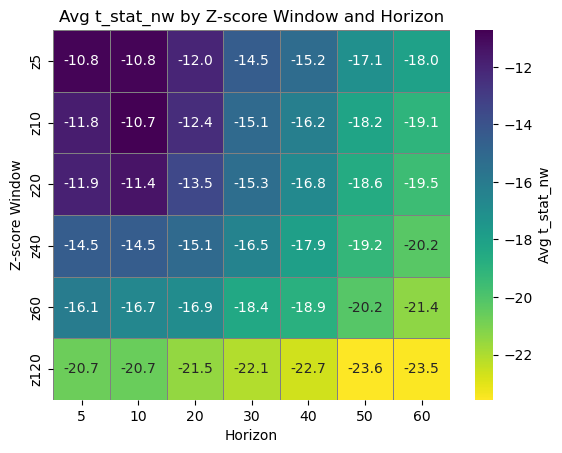

,mean_ic,std_ic,avg_t_stat,abs_t_stat,n_obs
zscore,,,,,
z120,-0.270555,0.252060,-22.770261,22.780481,7983575
z60,-0.212423,0.232116,-19.375698,19.389568,8046195
z40,-0.179541,0.212192,-17.905979,17.944646,8053855
z20,-0.134003,0.169944,-16.724272,16.814381,8030806
z10,-0.098335,0.127038,-16.285558,16.417550,7845360
z5,-0.068689,0.089217,-15.684415,15.828437,7113000


In [18]:

# Run optimization across universe (parallelized)
universe_summary = run_parallel_zscore_optimization(
    prices,
    z_windows,
    horizons,
    ic_window=252,
    min_obs=500,
    max_workers=8,
    lags=None,
    use_newey_west=True
)

summary, _ = analyze_ic_summary(universe_summary, stat_col="t_stat_nw")
display(summary)


In [18]:
## Stability test of metric ##
stability_df = evaluate_zscore_stability_over_time(
    prices,
    z_windows,
    horizons,
    ic_window=252,
    min_obs=500,
    step_years=1,
    window_years=2,
    max_workers=8,
    lags=None,
    use_newey_west=False,
    stat_col="t_stat_naive"
)


Window 1967 failed: No objects to concatenate
Window 1968 failed: No objects to concatenate
Window 2000 failed: No objects to concatenate
